<a href="https://colab.research.google.com/github/minheeyun/class2025Spring/blob/main/stride_classify_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자연어 기반 STRIDE 위협 분류

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. STRIDE 키워드, 위험도, 연결성 테이블 설정

In [ ]:
stride_keywords = {
    "Spoofing": ["위조", "사칭", "인증 우회"],
    "Tampering": ["변조", "수정", "무결성 위반"],
    "Repudiation": ["부인", "증거 삭제"],
    "Information Disclosure": ["노출", "유출", "비밀 공개"],
    "Denial of Service": ["차단", "서비스 거부", "지연"],
    "Elevation of Privilege": ["권한 상승", "루트 획득"]
}

stride_risk_levels = {
    "Spoofing": "Critical",
    "Tampering": "High",
    "Repudiation": "Medium",
    "Information Disclosure": "High",
    "Denial of Service": "Medium",
    "Elevation of Privilege": "Critical",
    "Unclassified": "Unknown"
}

stride_connections = {
    "Spoofing": ["Tampering", "Elevation of Privilege"],
    "Tampering": ["Information Disclosure", "Denial of Service"],
    "Repudiation": ["Information Disclosure"],
    "Information Disclosure": ["Elevation of Privilege"],
    "Denial of Service": [],
    "Elevation of Privilege": []
}

## 2. STRIDE 분석 관련 함수 정의

In [ ]:
def classify_stride_multi(uca_sentence):
    matched_strides = []
    tokens = uca_sentence.split()
    token_sentence = " ".join(tokens)
    for stride, keywords in stride_keywords.items():
        for keyword in keywords:
            if keyword in token_sentence:
                matched_strides.append(stride)
                break
    if matched_strides:
        return matched_strides
    else:
        return ["Unclassified"]

## 3. STRIDE 간 연관성 분석 함수

In [ ]:
def analyze_stride_sequence(matched_strides):
    sequence = []
    for stride in matched_strides:
        next_steps = stride_connections.get(stride, [])
        for next_stride in next_steps:
            if next_stride in matched_strides:
                sequence.append(f"{stride} → {next_stride}")
    if sequence:
        return ", ".join(sequence)
    else:
        return "None"

## 4. Confidence 계산 함수

In [ ]:
def calculate_confidence(matched_strides):
    if "Unclassified" in matched_strides:
        return "0%"
    else:
        base_score = 50
        per_stride = 10
        score = base_score + (len(matched_strides) - 1) * per_stride
        return f"{min(score, 100)}%"

## 5. STRIDE 위험도 반환 함수

In [ ]:
def get_stride_risk_levels(matched_strides):
    risks = []
    for stride in matched_strides:
        risk = stride_risk_levels.get(stride, "Unknown")
        risks.append(f"{stride} ({risk})")
    return ", ".join(risks)

## 6. 분석 수행 함수

In [ ]:
def perform_stride_analysis(sentences):
    results = []
    for sentence in sentences:
        strides = classify_stride_multi(sentence)
        sequence = analyze_stride_sequence(strides)
        confidence = calculate_confidence(strides)
        risks = get_stride_risk_levels(strides)
        results.append({
            "UCA 문장": sentence,
            "추천 STRIDE 유형": ", ".join(strides),
            "STRIDE 위험도": risks,
            "Confidence": confidence,
            "STRIDE 간 연관성": sequence
        })
    return pd.DataFrame(results)

## 7. 공격 시나리오 문장 분석 (테스트)

In [ ]:
local_sentences = [
    "운전자가 인증 절차를 우회하고 제어 명령을 변조할 수 있다.",
    "공격자가 시스템 로그를 삭제하고 비밀 데이터를 유출할 수 있다.",
    "공격자는 서비스 요청을 지연시키면서 권한을 상승시킬 수 있다.",
    "공격자가 인증 우회 후 시스템을 변조하고 로그를 삭제한다.",
    "시스템이 외부로 비밀 정보를 노출하고 서비스 요청을 차단한다."
]

## 8. STRIDE 분석 수행 결과 분석 및 출력

In [ ]:
df = perform_stride_analysis(local_sentences)
display(df)

,UCA 문장,추천 STRIDE 유형,STRIDE 위험도,Confidence,STRIDE 간 연관성
0,운전자가 인증 절차를 우회하고 제어 명령을 변조할 수 있다.,Tampering,Tampering (High),50%,None
1,공격자가 시스템 로그를 삭제하고 비밀 데이터를 유출할 수 있다.,Information Disclosure,Information Disclosure (High),50%,None
2,공격자는 서비스 요청을 지연시키면서 권한을 상승시킬 수 있다.,Denial of Service,Denial of Service (Medium),50%,None
3,공격자가 인증 우회 후 시스템을 변조하고 로그를 삭제한다.,"Spoofing, Tampering","Spoofing (Critical), Tampering (High)",60%,Spoofing → Tampering
4,시스템이 외부로 비밀 정보를 노출하고 서비스 요청을 차단한다.,"Information Disclosure, Denial of Service","Information Disclosure (High), Denial of Servi...",60%,None


## 9. 위험도별 문장수를 막대그래프로 시각화

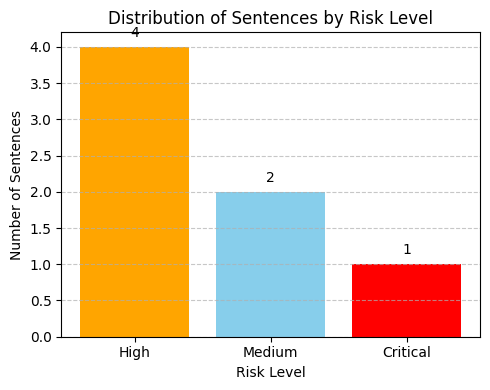

In [ ]:
# 위험도별 문장 수 계산
risk_counts = {}
for risks in df['STRIDE 위험도']:
    for risk in risks.split(", "):
        level = risk.split("(")[-1].strip(")")
        risk_counts[level] = risk_counts.get(level, 0) + 1

# 색깔 매핑
color_map = {
    "Critical": "red",
    "High": "orange",
    "Medium": "skyblue",
    "Low": "lightgreen",
    "Unknown": "grey"
}
colors = [color_map.get(risk, "grey") for risk in risk_counts.keys()]

# Matplotlib 기본 폰트로 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 막대그래프 시각화
plt.figure(figsize=(5,4))
bars = plt.bar(risk_counts.keys(), risk_counts.values(), color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=10)

plt.xlabel('Risk Level')
plt.ylabel('Number of Sentences')
plt.title('Distribution of Sentences by Risk Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 10. 결과 분석에 대한 통계 정리

In [ ]:
# STRIDE 유형별 발생 빈도 자연어 출력
print("\n 1. STRIDE 유형별 발생 빈도")
stride_counts = df['추천 STRIDE 유형'].value_counts()
for stride, count in stride_counts.items():
    print(f"- {stride}: {count}건 발생")

# 평균 Confidence 자연어 출력
print("\n\n 2. 평균 Confidence")
confidences = df['Confidence'].apply(lambda x: int(x.strip('%')))
avg_confidence = confidences.mean()
print(f"- 전체 문장의 평균 Confidence는 {avg_confidence:.2f}%입니다.")

# Confidence 값에 따라 설명 문구를 다르게 출력
if avg_confidence >= 80:
    print("\n 이는 STRIDE 매칭 신뢰도가 매우 높은 수준임을 나타냅니다.")
elif avg_confidence >= 60:
    print("\n 이는 STRIDE 매칭 신뢰도가 상당히 신뢰할 수 있는 수준임을 나타냅니다.")
elif avg_confidence >= 40:
    print("\n 이는 STRIDE 매칭 신뢰도가 적정 수준이나 추가 검토가 필요함을 나타냅니다.")
else:
    print("\n 이는 STRIDE 매칭 신뢰도가 낮아 재검토가 필요함을 나타냅니다.")

# 위험도별 문장 수 계산
risk_counts = {}
for risks in df['STRIDE 위험도']:
    for risk in risks.split(", "):
        level = risk.split("(")[-1].strip(")")
        risk_counts[level] = risk_counts.get(level, 0) + 1

# 위험도별 문장 수 출력
print("\n\n 3. 위험도별 문장 수:")
for level, count in risk_counts.items():
    print(f"- {level} 위험도에 해당하는 문장은 총 {count}건입니다.")

# 가장 많이 발생한 위험도 찾아서 문장 출력
max_risk_level = max(risk_counts, key=risk_counts.get)
max_risk_count = risk_counts[max_risk_level]

print(f"\n 특히 {max_risk_level} 위험도 문장이 가장 많아 ({max_risk_count}건) 우선 대응이 필요합니다.")


 1. STRIDE 유형별 발생 빈도
- Tampering: 1건 발생
- Information Disclosure: 1건 발생
- Denial of Service: 1건 발생
- Spoofing, Tampering: 1건 발생
- Information Disclosure, Denial of Service: 1건 발생


 2. 평균 Confidence
- 전체 문장의 평균 Confidence는 54.00%입니다.

 이는 STRIDE 매칭 신뢰도가 적정 수준이나 추가 검토가 필요함을 나타냅니다.


 3. 위험도별 문장 수:
- High 위험도에 해당하는 문장은 총 4건입니다.
- Medium 위험도에 해당하는 문장은 총 2건입니다.
- Critical 위험도에 해당하는 문장은 총 1건입니다.

 특히 High 위험도 문장이 가장 많아 (4건) 우선 대응이 필요합니다.
